In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
college = pd.read_csv('/Users/Pawan Kumar/Downloads/College.csv')

In [54]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [55]:
college.Private.value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [56]:
# college.isna().sum()

In [57]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
college.Private = lb.fit_transform(college.Private)

In [58]:
y = college.Private

In [59]:
x = college.drop('Private', axis = 1)

In [60]:
from sklearn.preprocessing import StandardScaler
sds = StandardScaler()
x = sds.fit_transform(x)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 8380, test_size = 0.25)

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, precision_score, recall_score
from sklearn.model_selection import KFold, validation_curve, cross_val_score, GridSearchCV

In [63]:
model = SVC(C= 1)

In [64]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
print('The Confudion matrix is :',confusion_matrix(y_test, y_pred).round(2))
print('The prediction score is :', precision_score(y_test, y_pred).round(2))
print('The recall score is :', recall_score(y_test, y_pred).round(2))
print('The accuaracy score is :',accuracy_score(y_test, y_pred).round(2))
print('The R2 score is :',r2_score(y_test, y_pred).round(2))

The Confudion matrix is : [[ 41   3]
 [  5 146]]
The prediction score is : 0.98
The recall score is : 0.97
The accuaracy score is : 0.96
The R2 score is : 0.77


# Hyper parametric test 

In [67]:
folds = KFold(n_splits=5, shuffle=True, random_state=8380)
# initializing the models
model = SVC(C=1)

In [68]:
cvresults = cross_val_score(model, x_train, y_train, cv = folds)

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\svm\

In [70]:
print(cvresults)
print('The mean of the cv results is ',np.mean(cvresults).round(3))

[0.93162393 0.93162393 0.93965517 0.9137931  0.89655172]
The mean of the cv results is  0.923


In [74]:
params ={'C': [0.1, 1, 10, 100]}

In [75]:
model = SVC()

model_cv = GridSearchCV(estimator=model, param_grid=params, verbose=1, return_train_score=True, cv = folds)

In [76]:
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warnin

GridSearchCV(cv=KFold(n_splits=5, random_state=8380, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010784,0.000745,0.002999,0.000632,0.1,{'C': 0.1},0.914530,0.905983,0.922414,0.862069,...,0.893471,0.026090,4,0.903226,0.911828,0.907725,0.905579,0.914163,0.908504,0.004002
1,0.007796,0.000400,0.001599,0.000489,1,{'C': 1},0.931624,0.931624,0.939655,0.913793,...,0.922680,0.015537,1,0.948387,0.952688,0.963519,0.957082,0.957082,0.955752,0.005050
2,0.012193,0.004873,0.002600,0.000801,10,{'C': 10},0.931624,0.923077,0.913793,0.913793,...,0.919244,0.007178,2,0.984946,0.989247,0.987124,0.989270,0.989270,0.987972,0.001725
3,0.010393,0.000800,0.001600,0.000490,100,{'C': 100},0.914530,0.940171,0.905172,0.913793,...,0.917526,0.011869,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


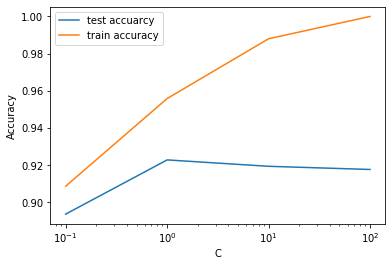

In [78]:
plt.figure()
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuarcy', 'train accuracy'])
plt.xscale('log')

In [91]:
# So as we can see that at C value of 1 we are getting best accuracy so,
model = SVC(C=1)

In [92]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [93]:
print('The Confudion matrix is :',confusion_matrix(y_test, y_pred).round(2))
print('The prediction score is :', precision_score(y_test, y_pred).round(2))
print('The recall score is :', recall_score(y_test, y_pred).round(2))
print('The accuaracy score is :',accuracy_score(y_test, y_pred).round(2))
print('The R2 score is :',r2_score(y_test, y_pred).round(2))

The Confudion matrix is : [[ 41   3]
 [  5 146]]
The prediction score is : 0.98
The recall score is : 0.97
The accuaracy score is : 0.96
The R2 score is : 0.77
